In [1]:
import cv2
import numpy as np
from superpoint.datasets.coco import Coco
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
config = {
    'labels': 'outputs/magic-point_coco_homography-0',
    'truncate': 50,
}
dataset = Coco(**config)
data = dataset.get_test_set()

In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

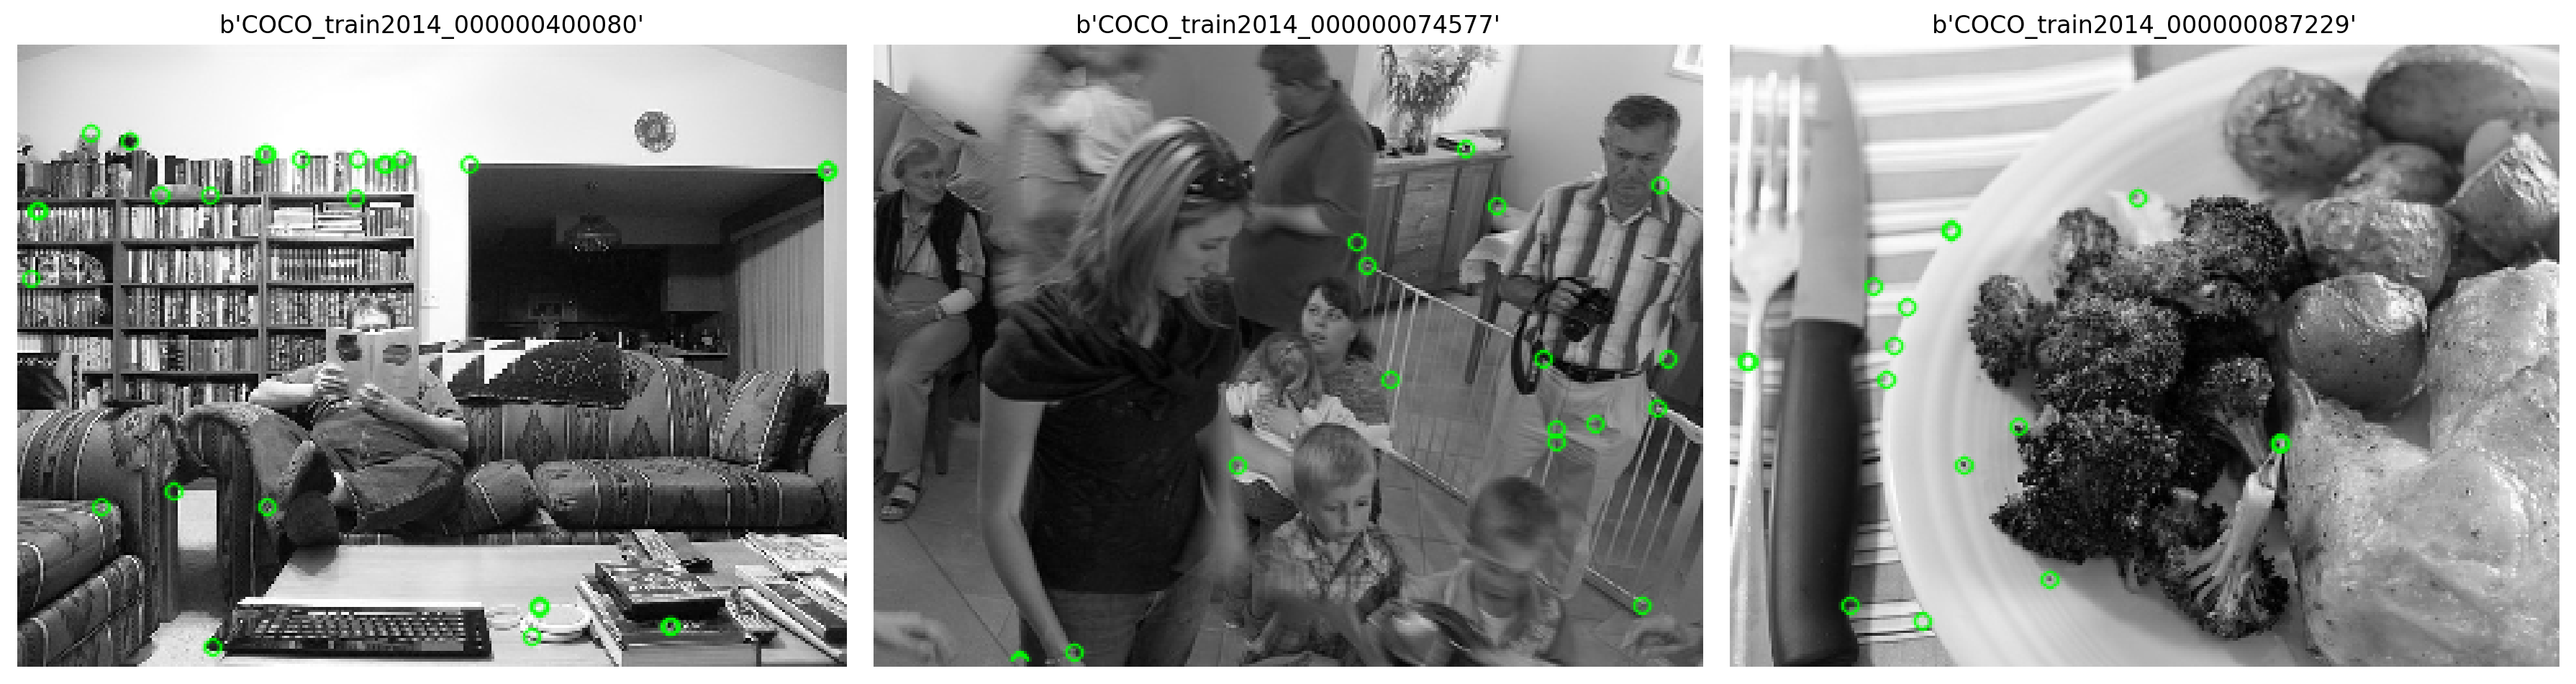

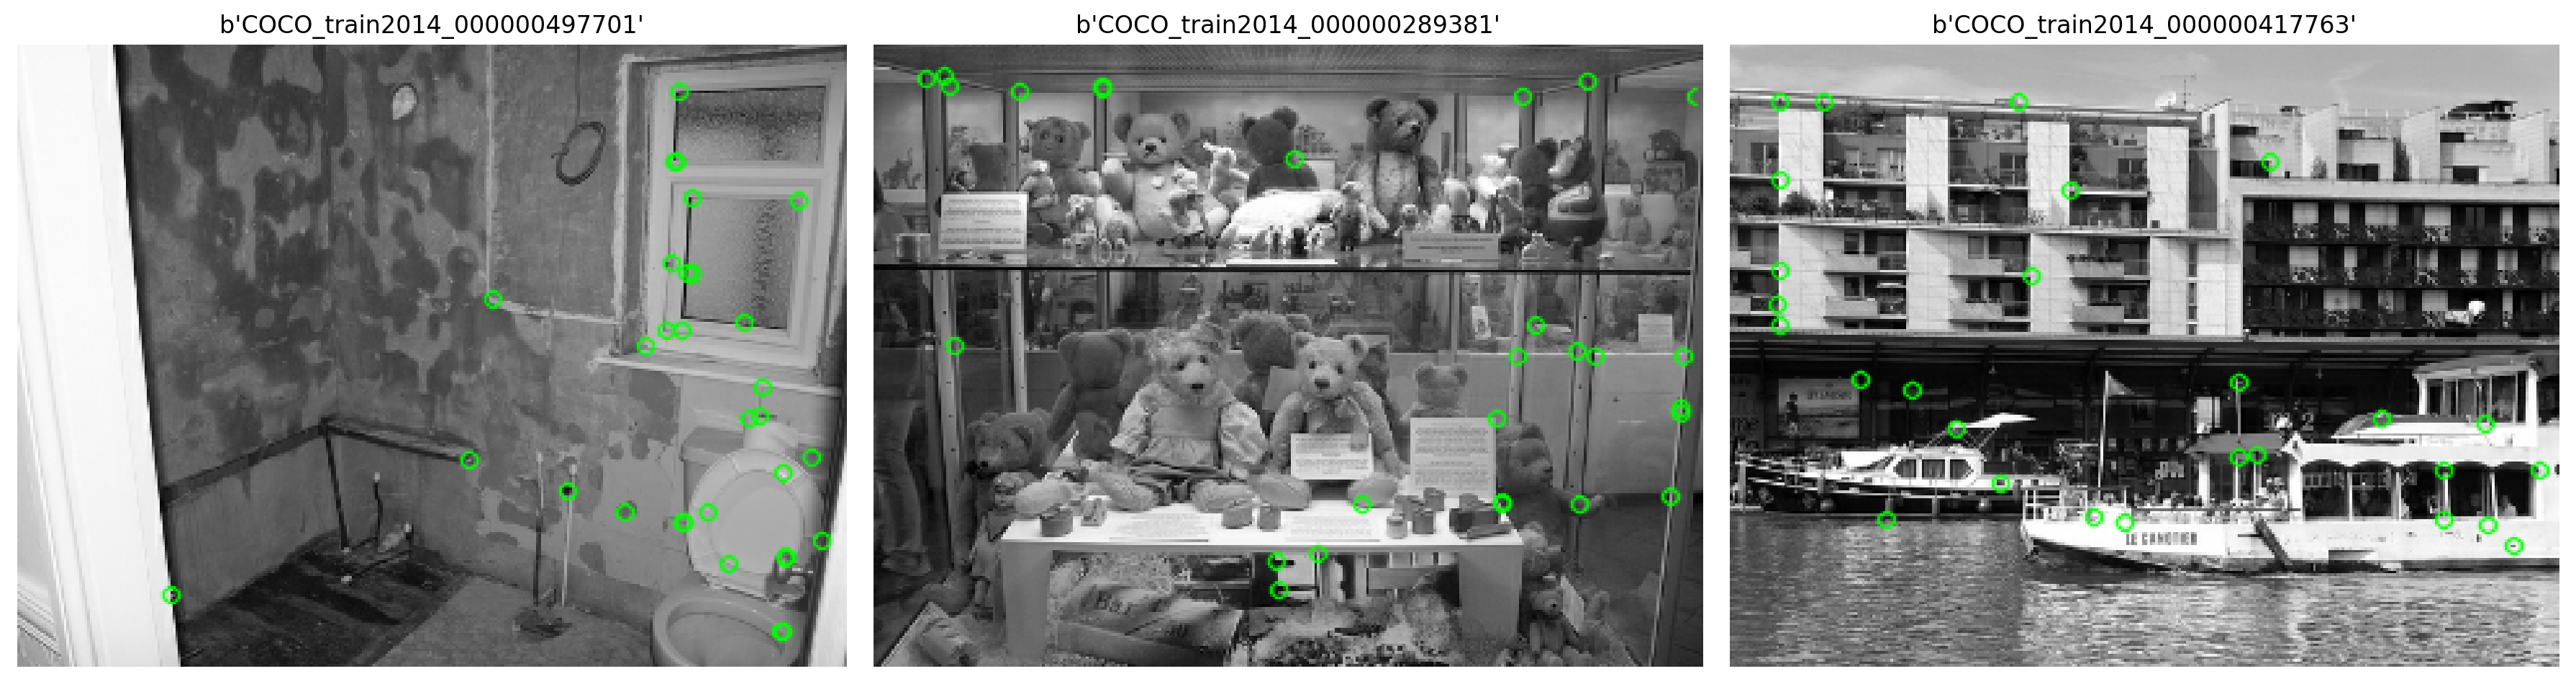

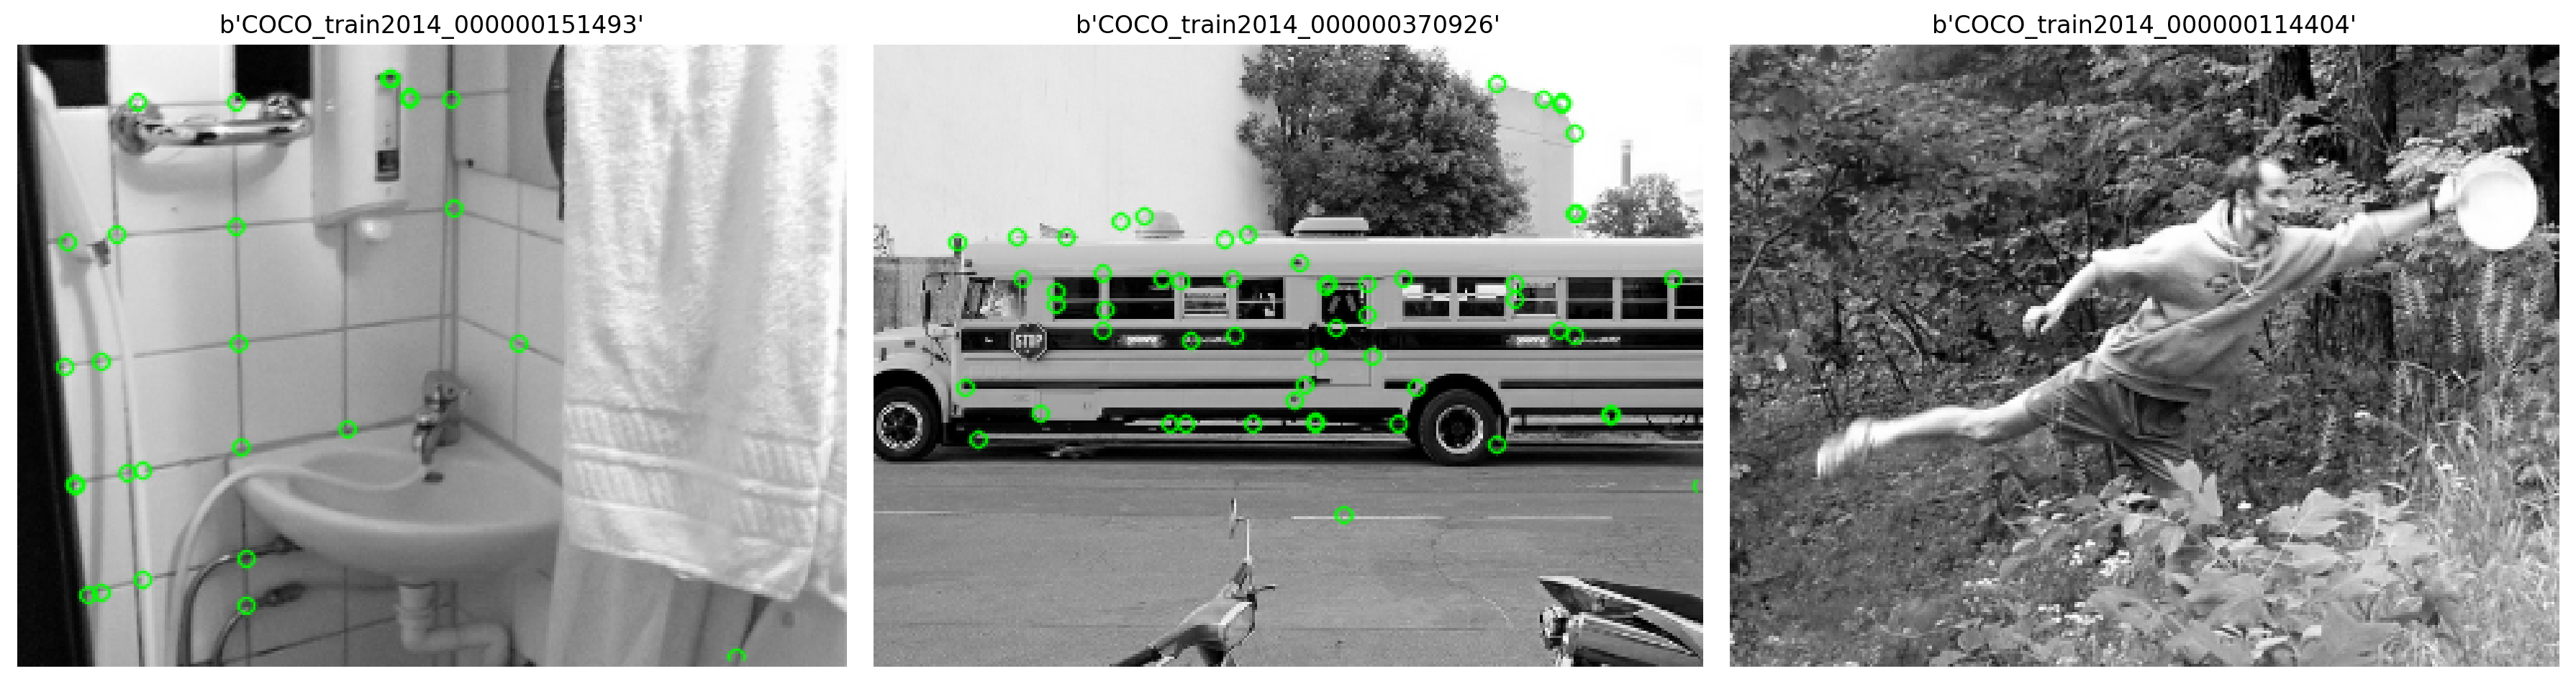

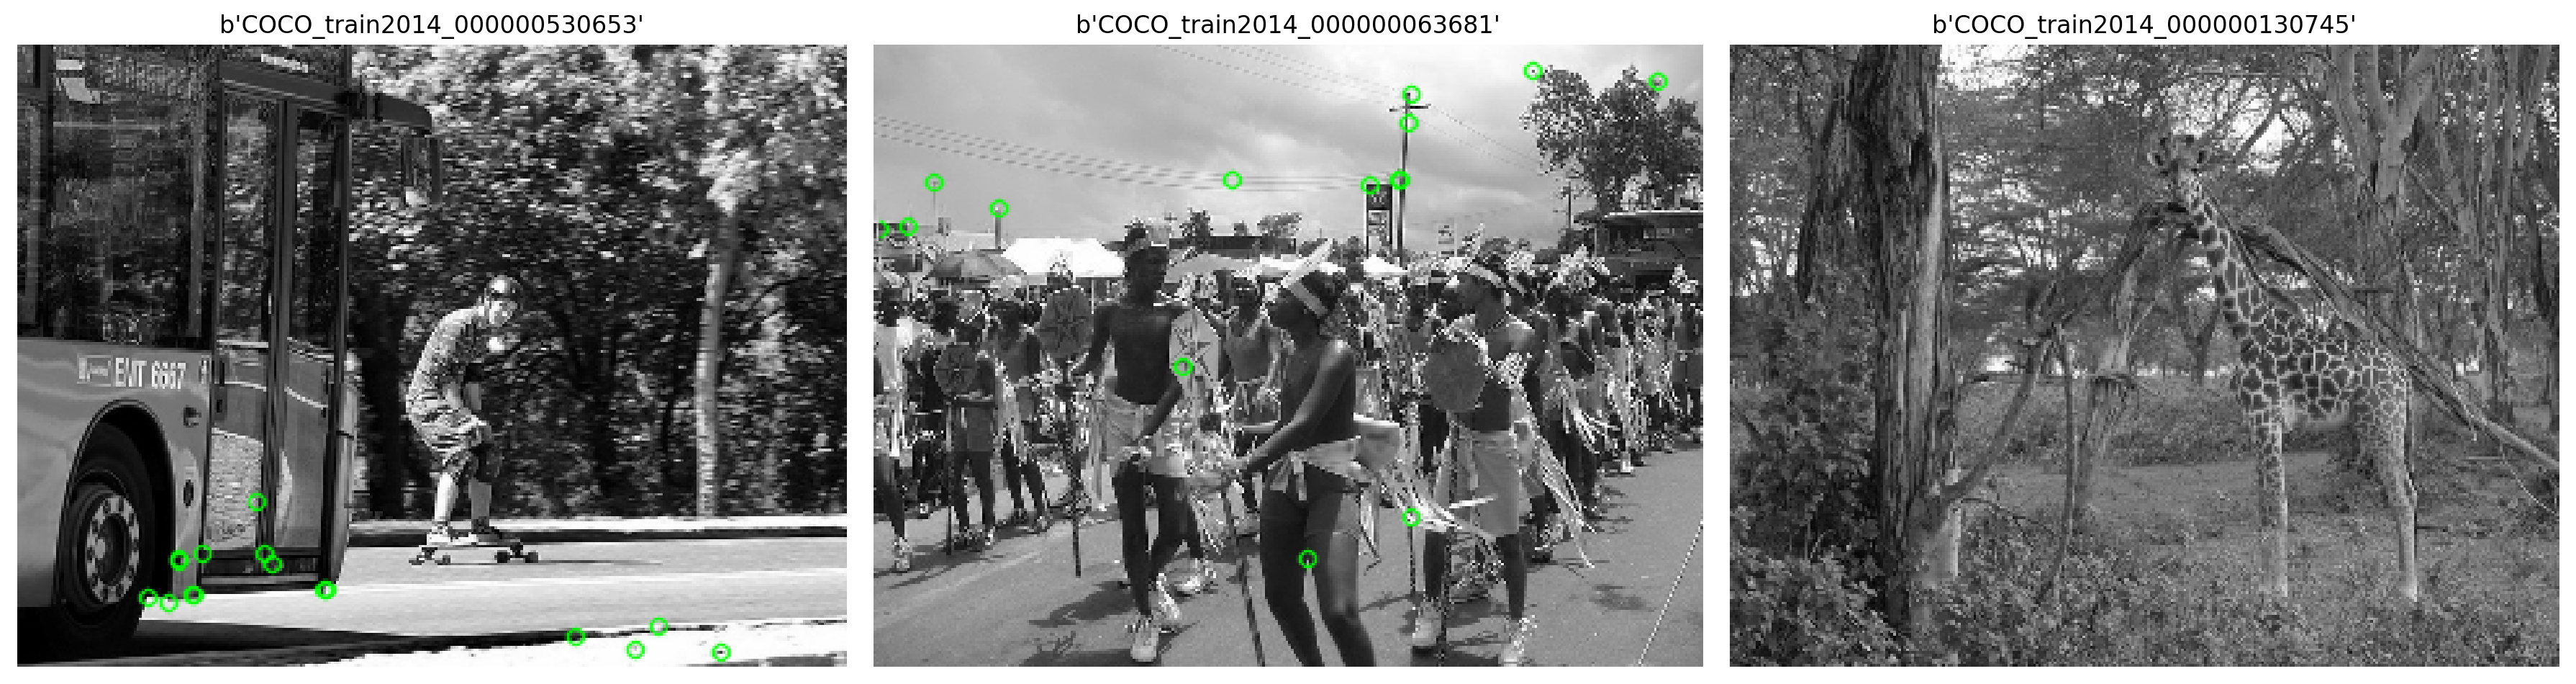

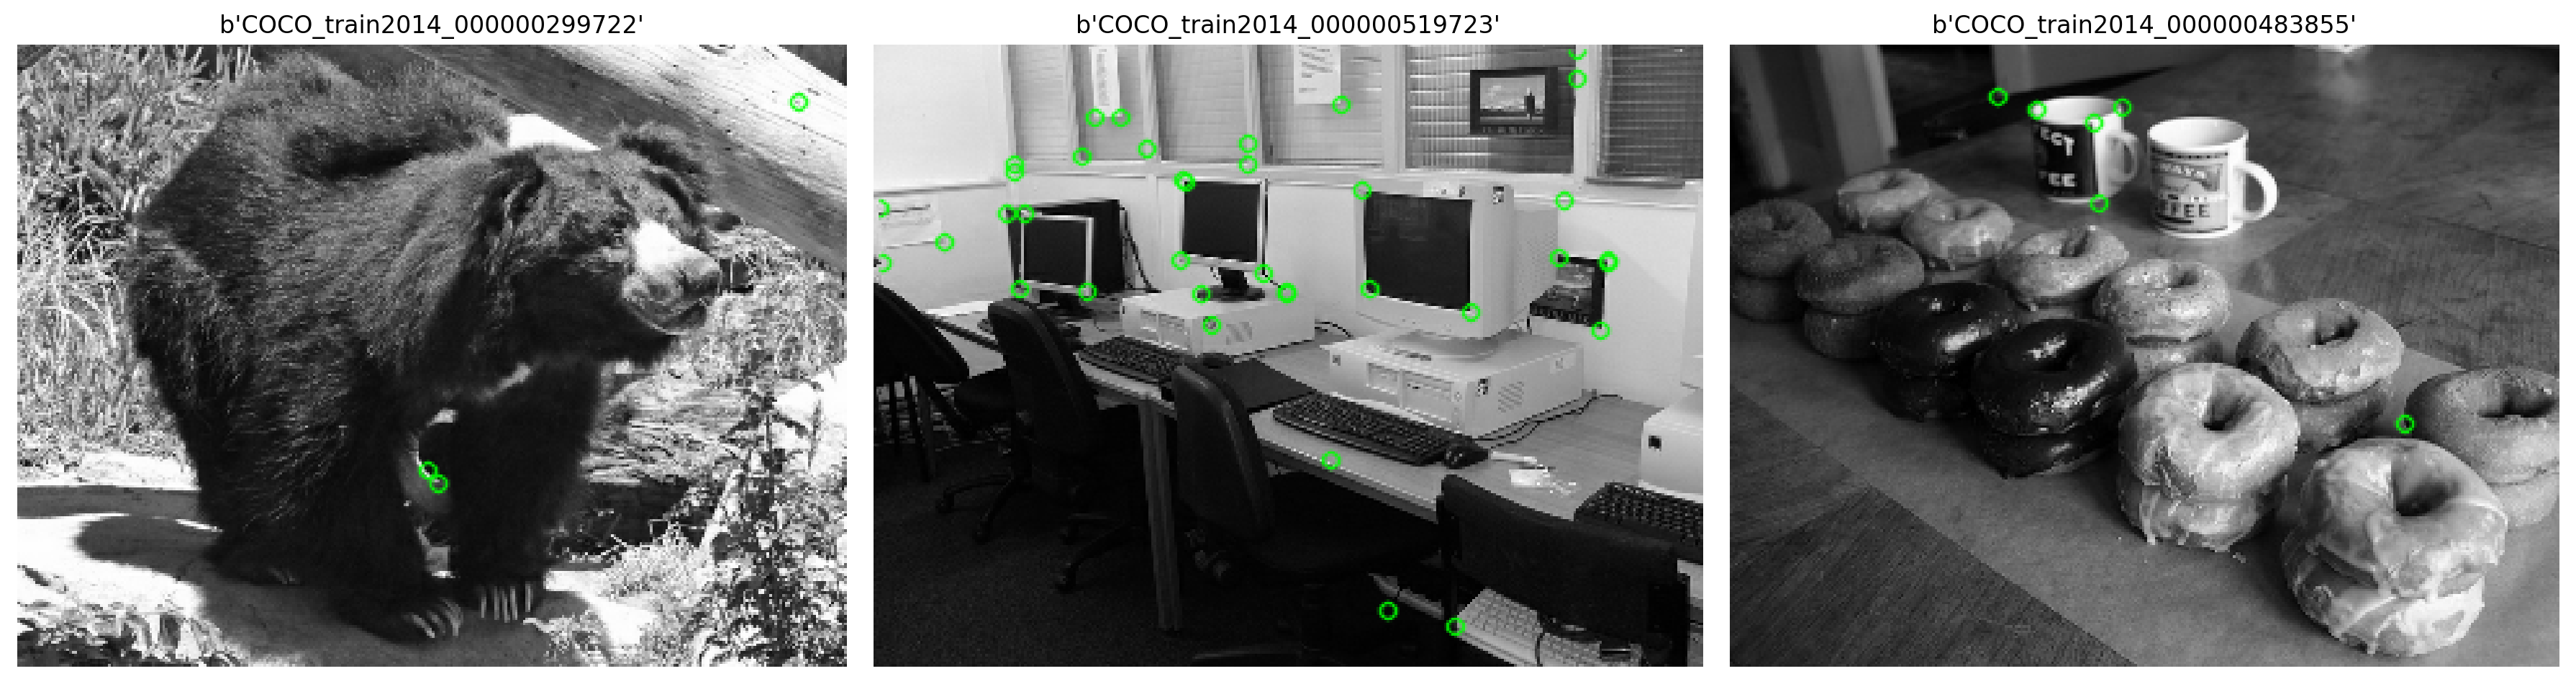

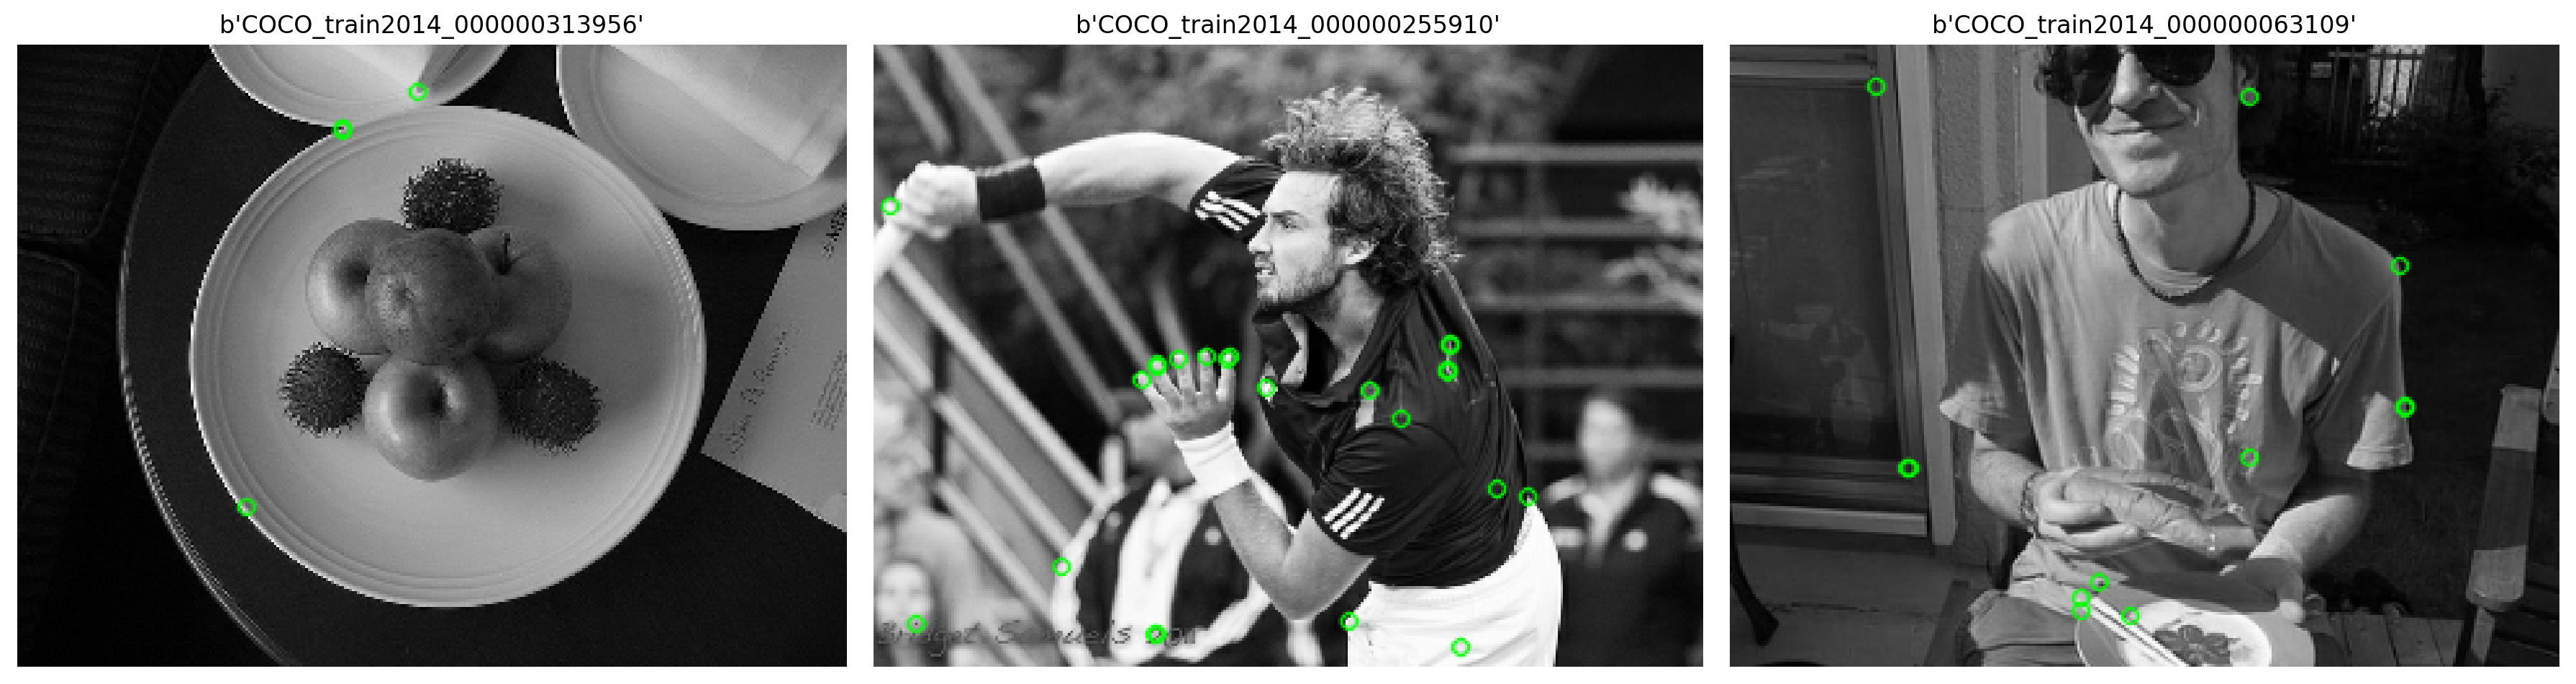

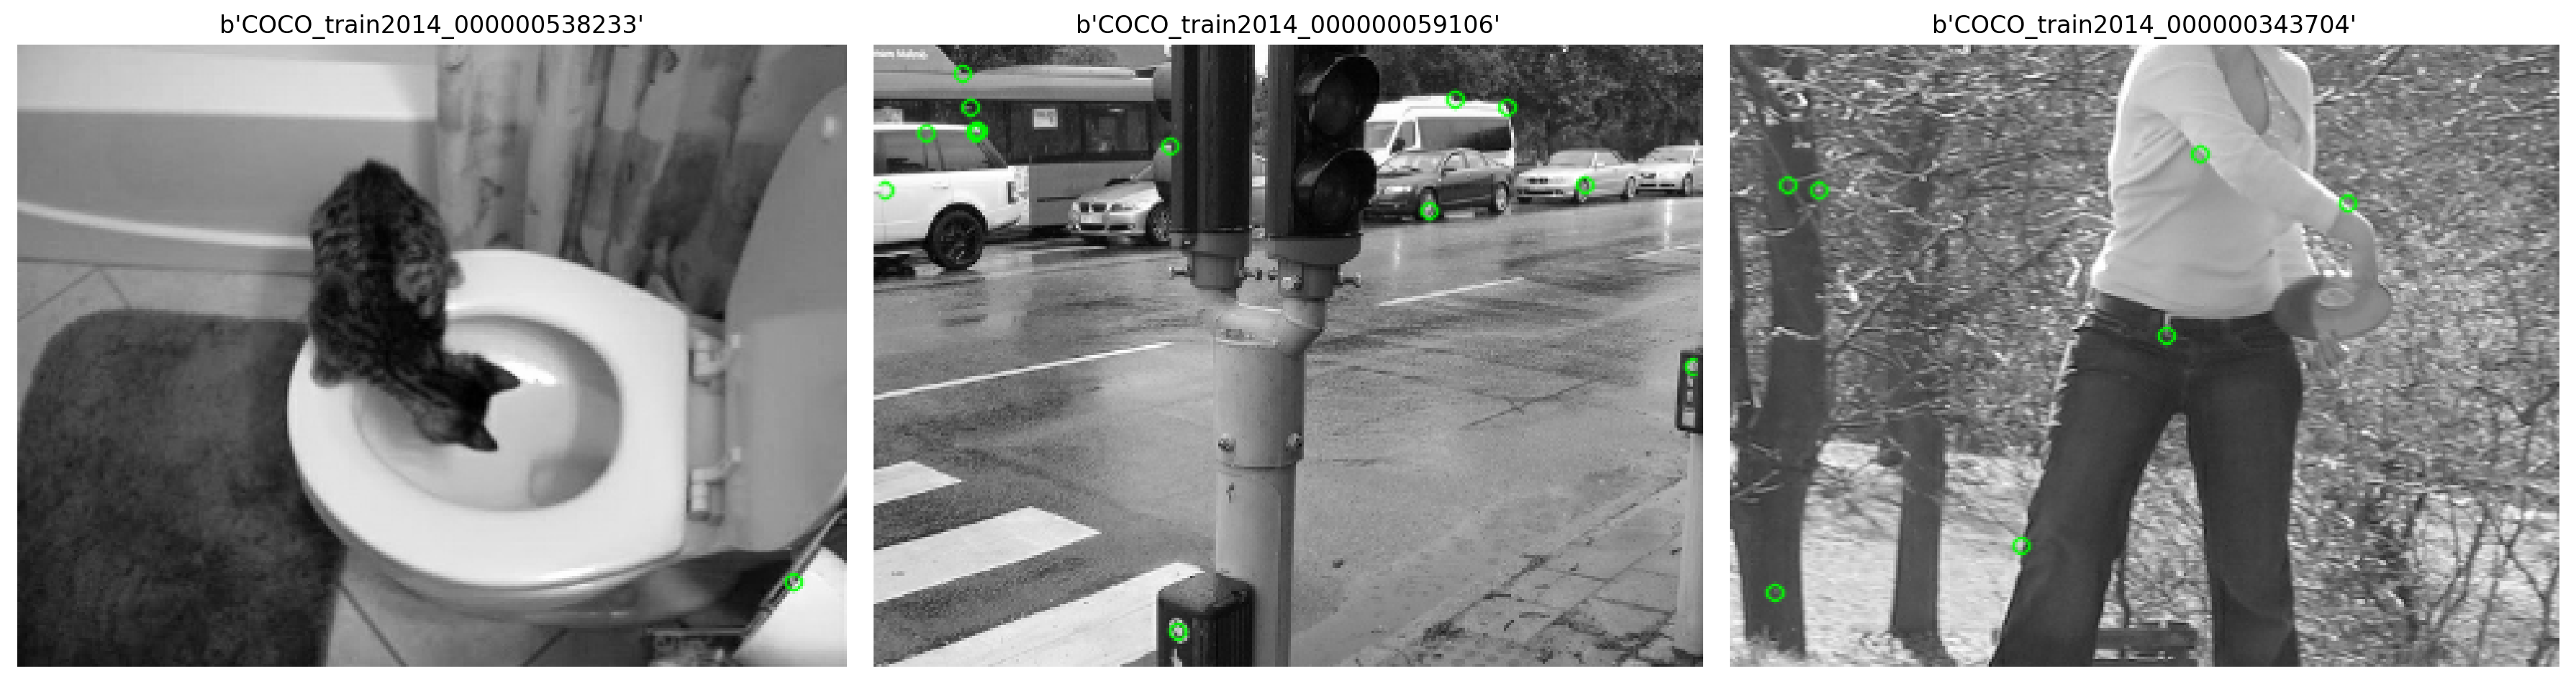

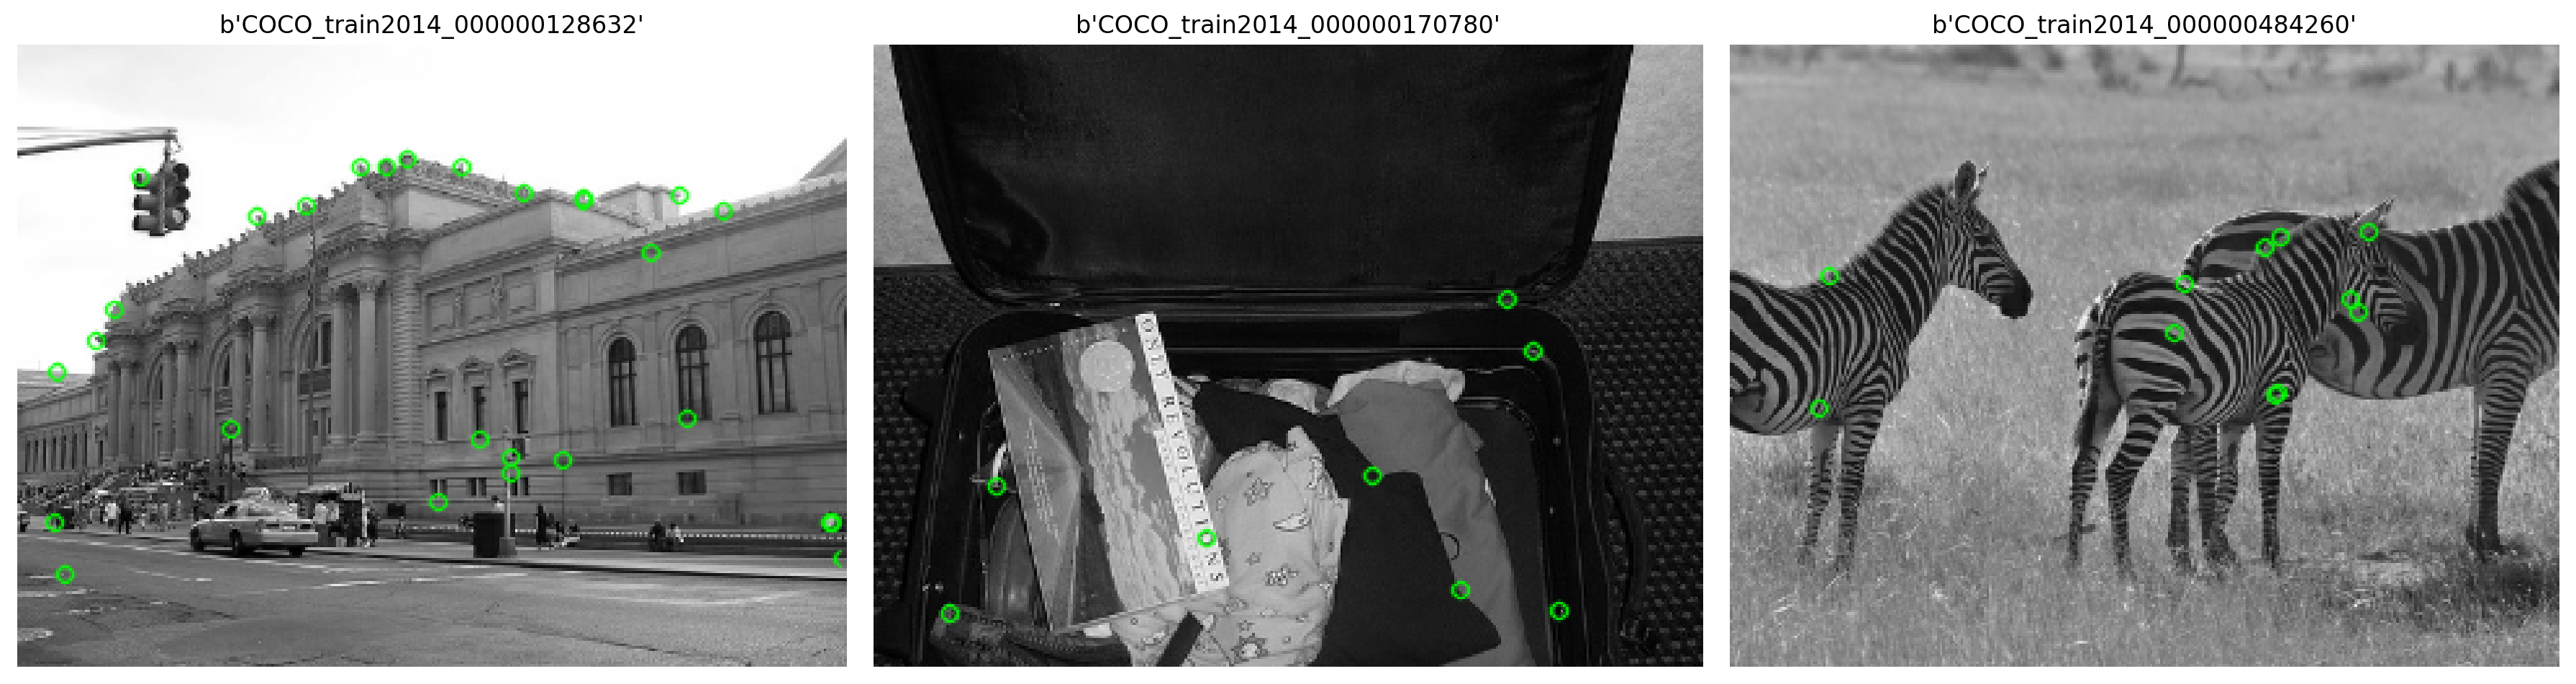

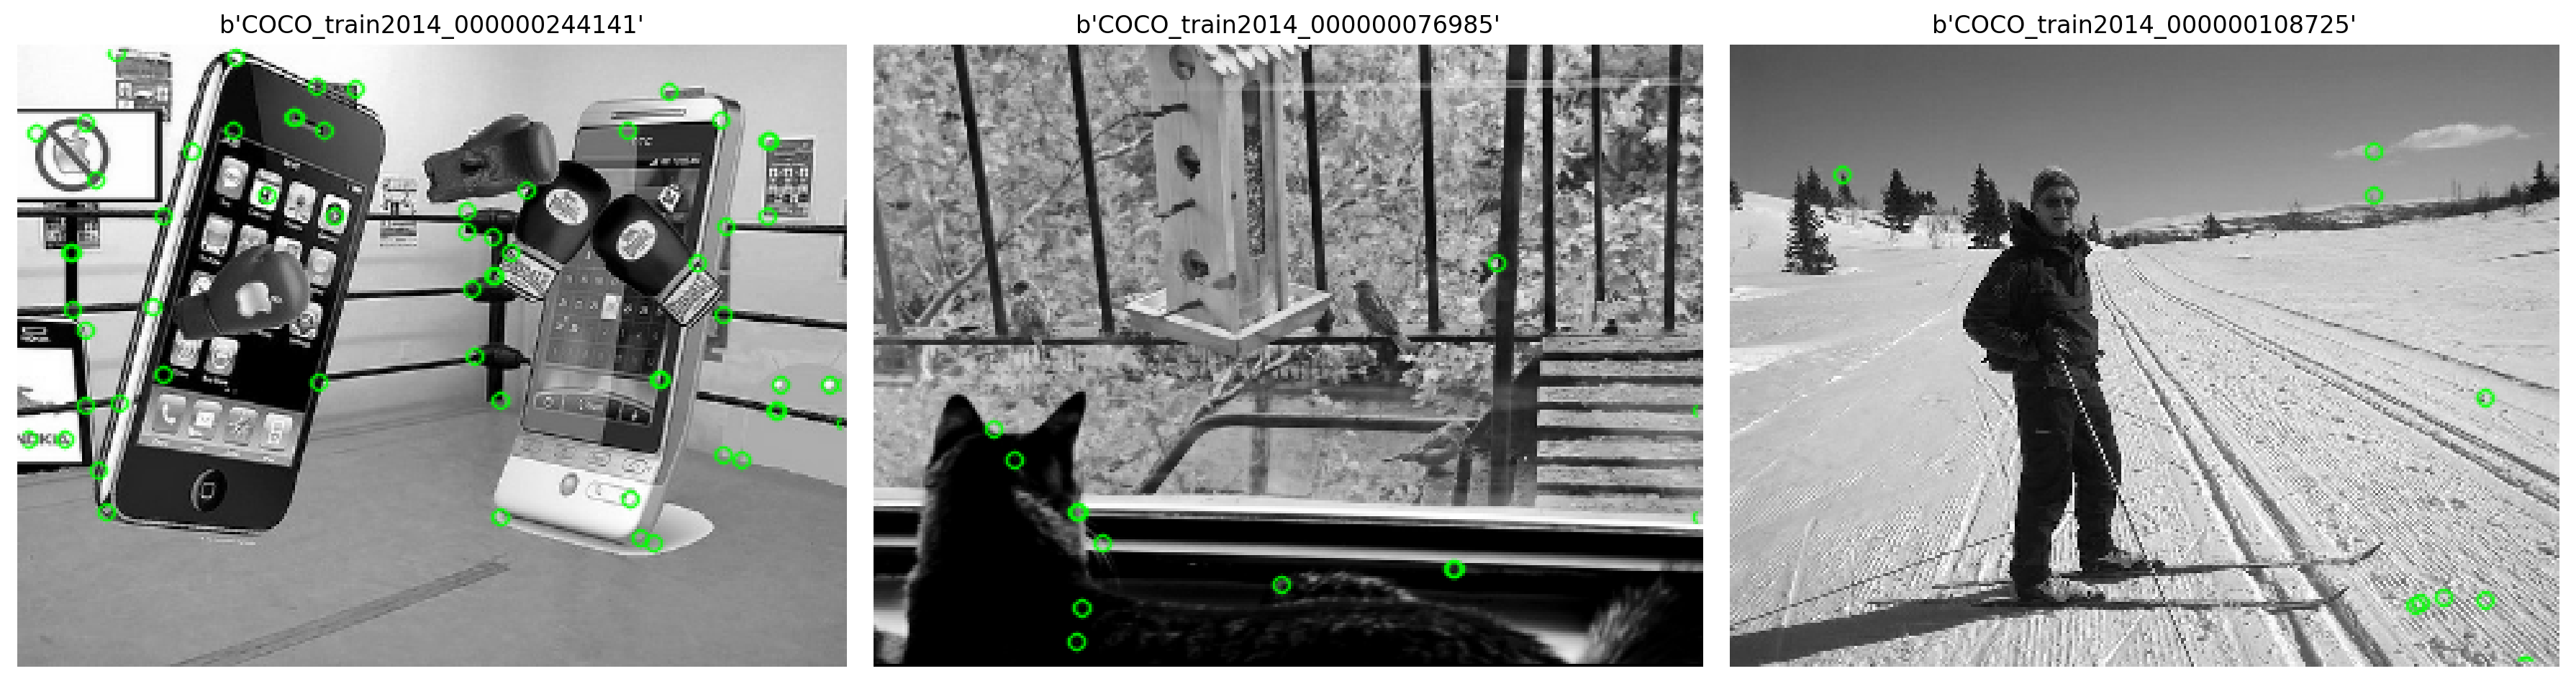

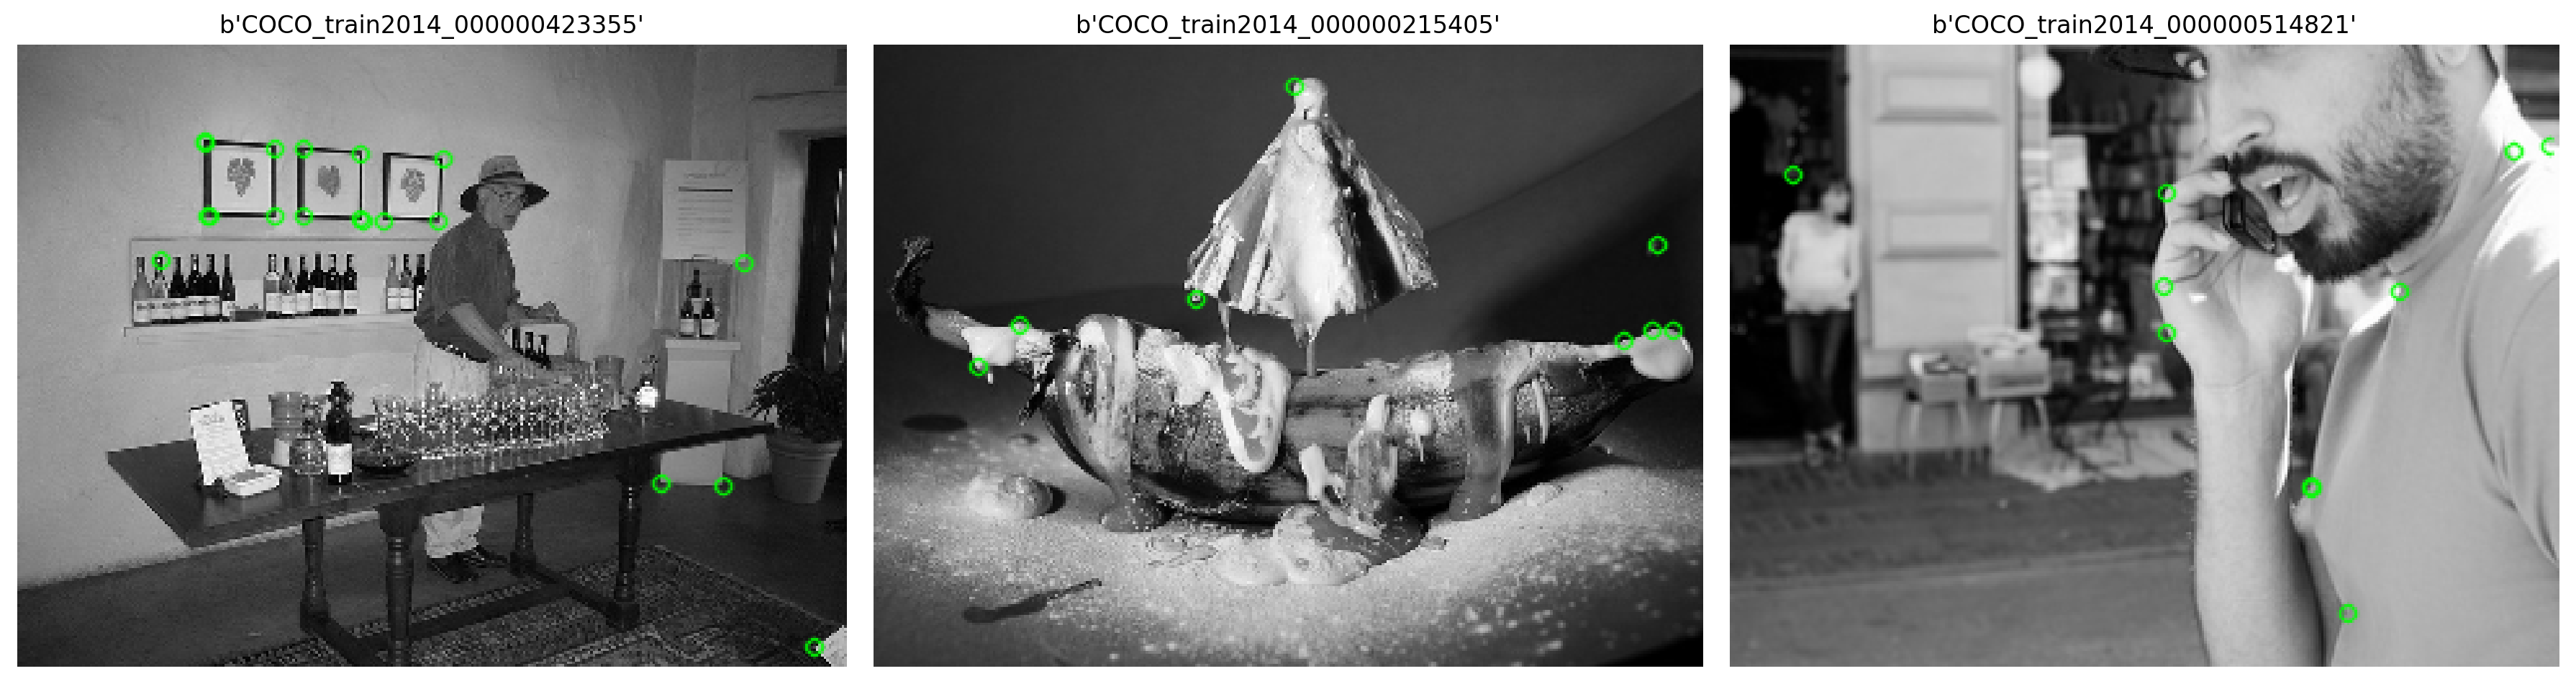

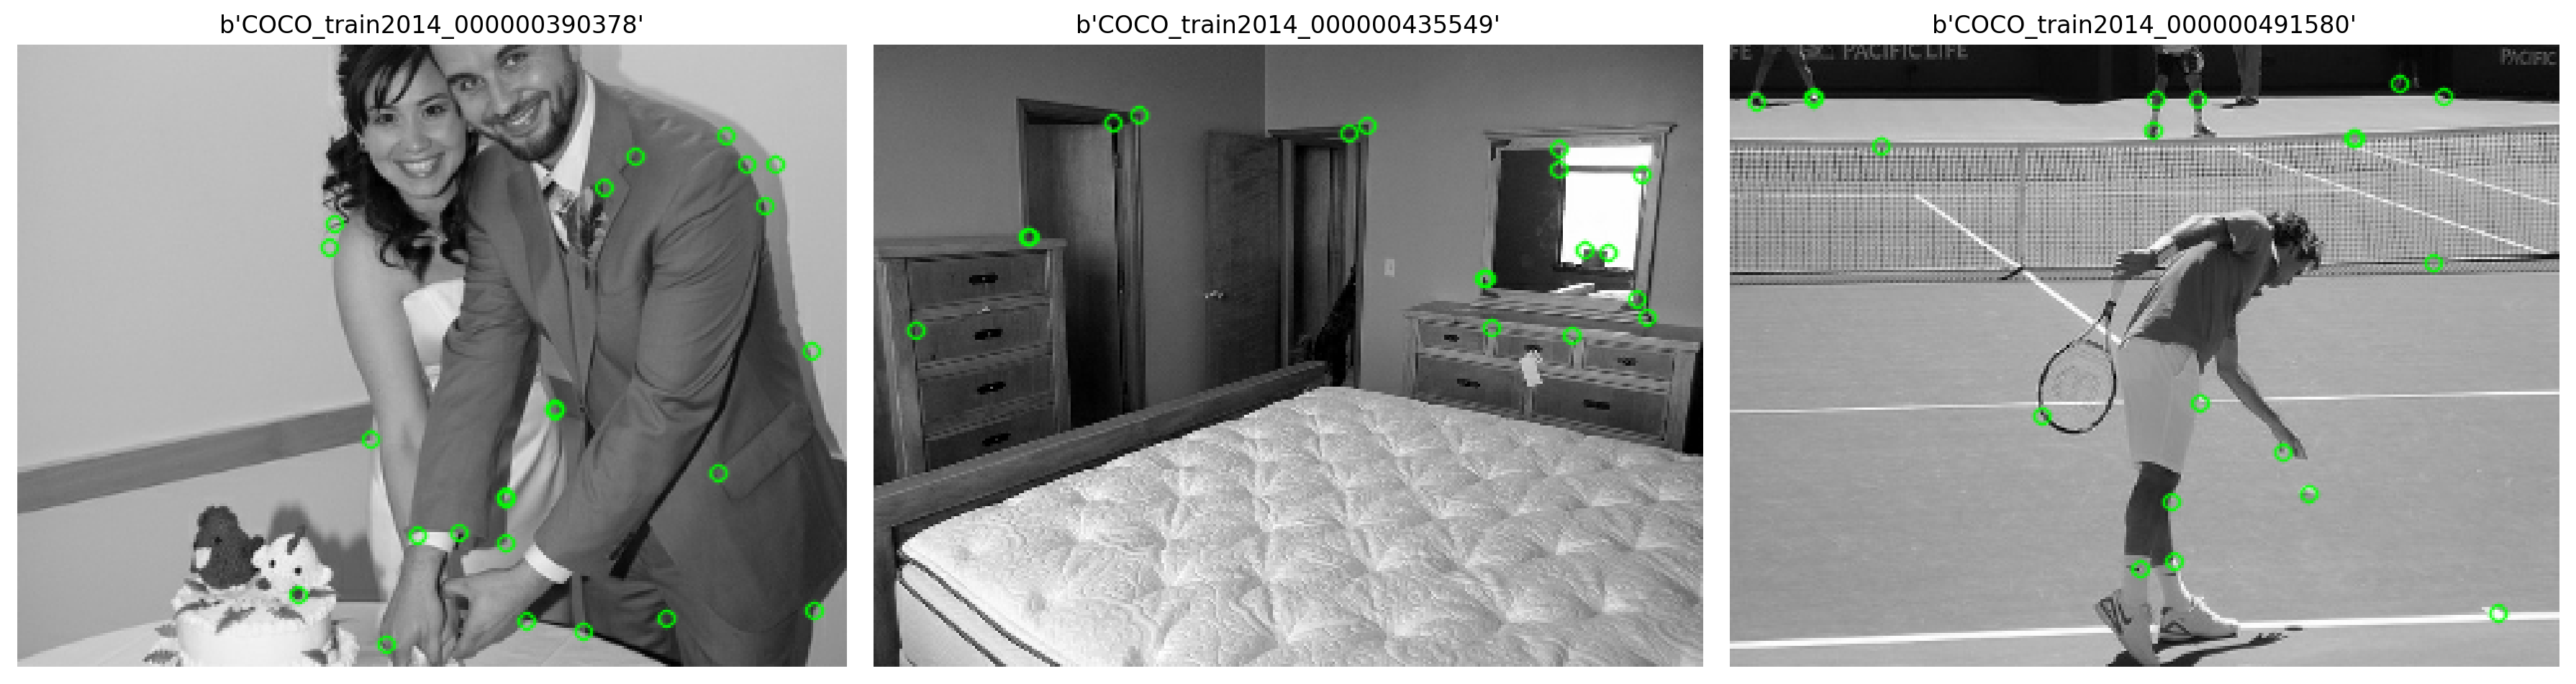

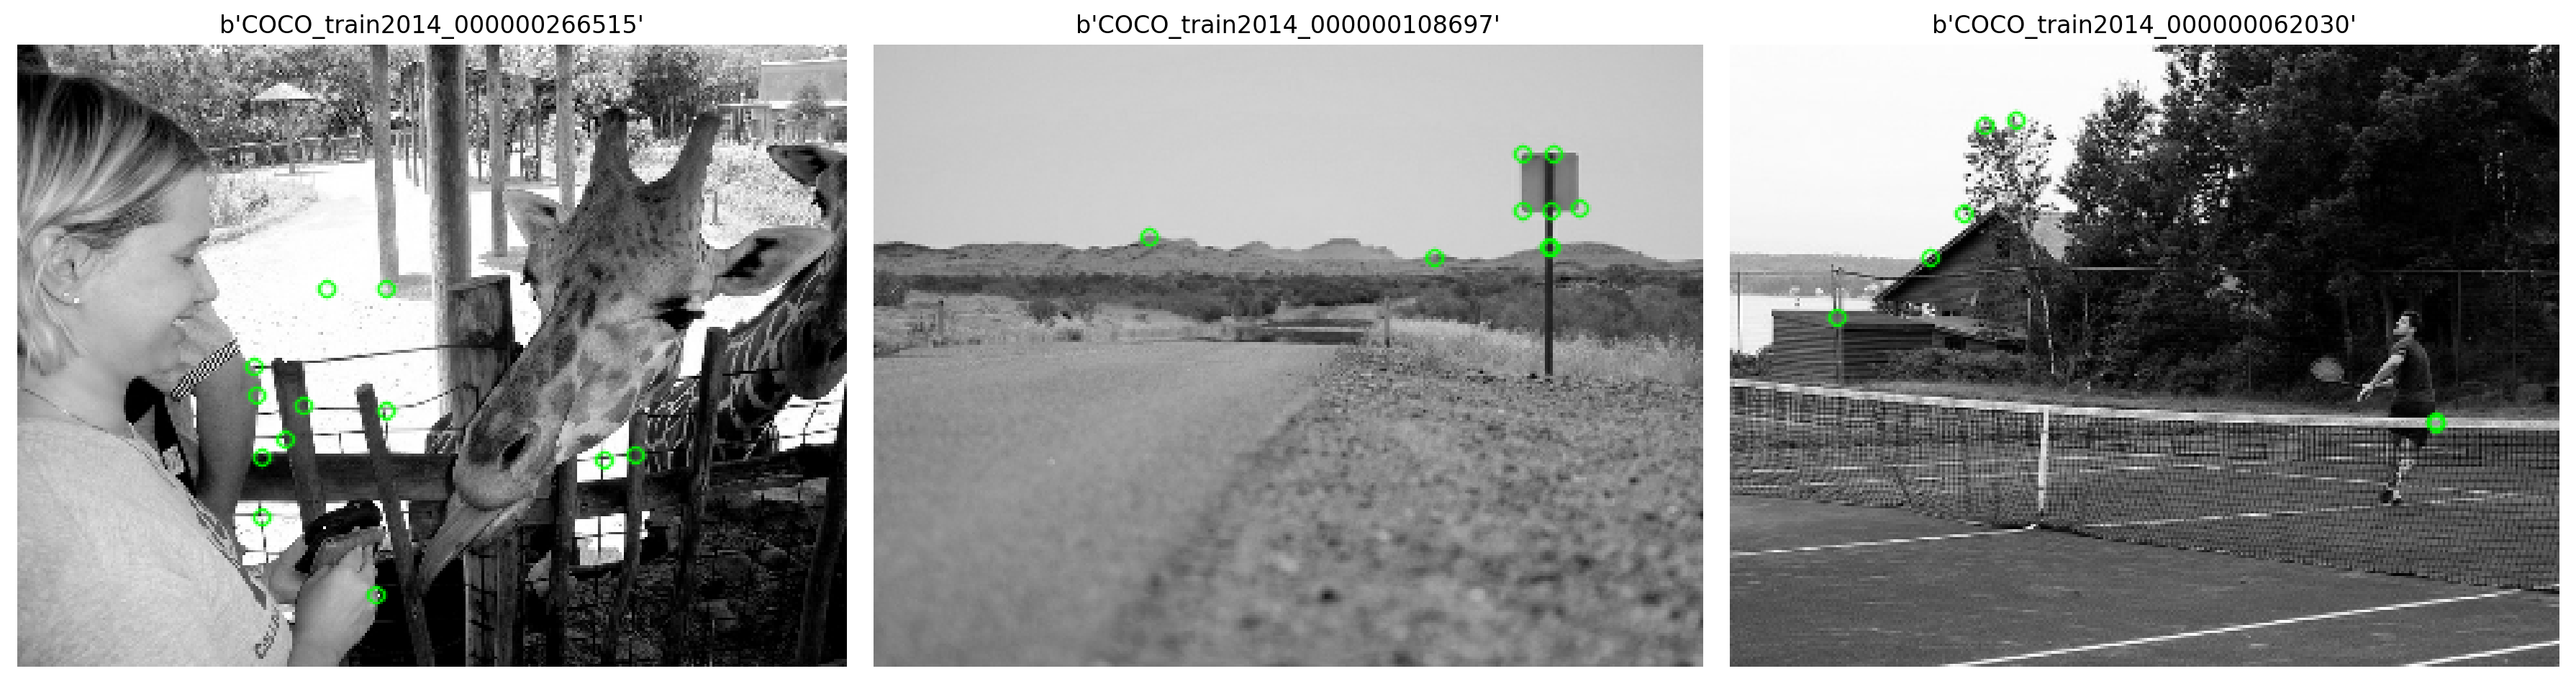

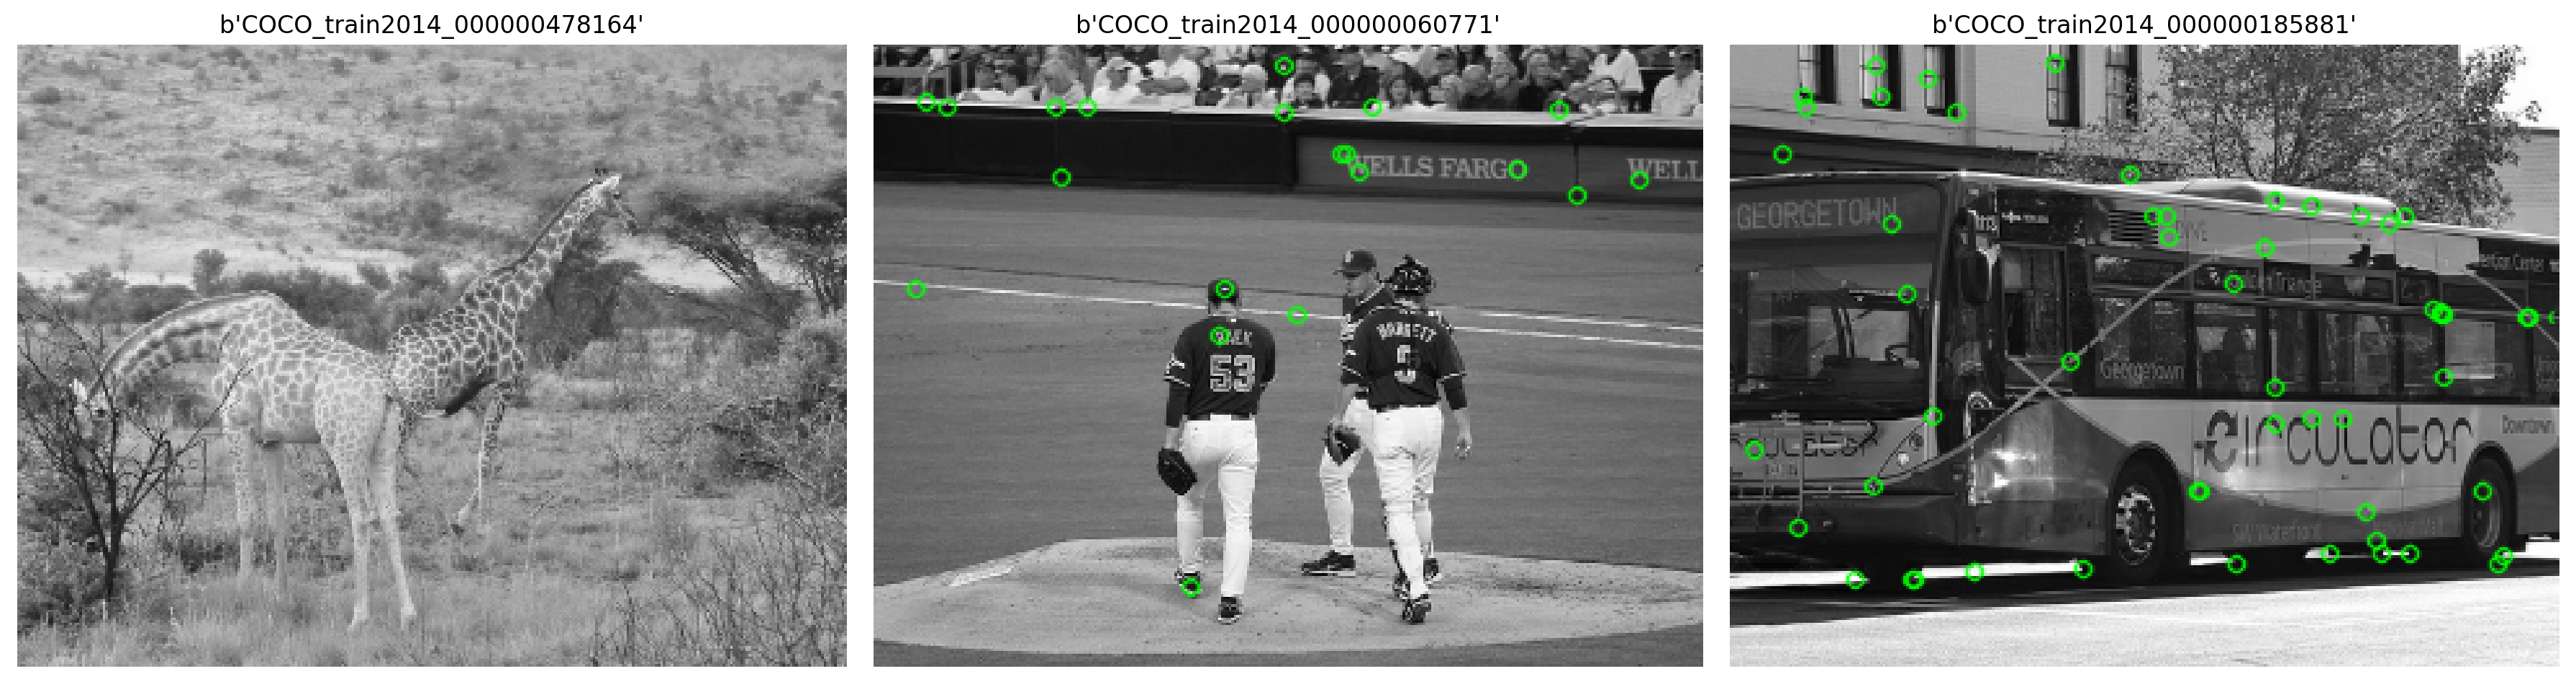

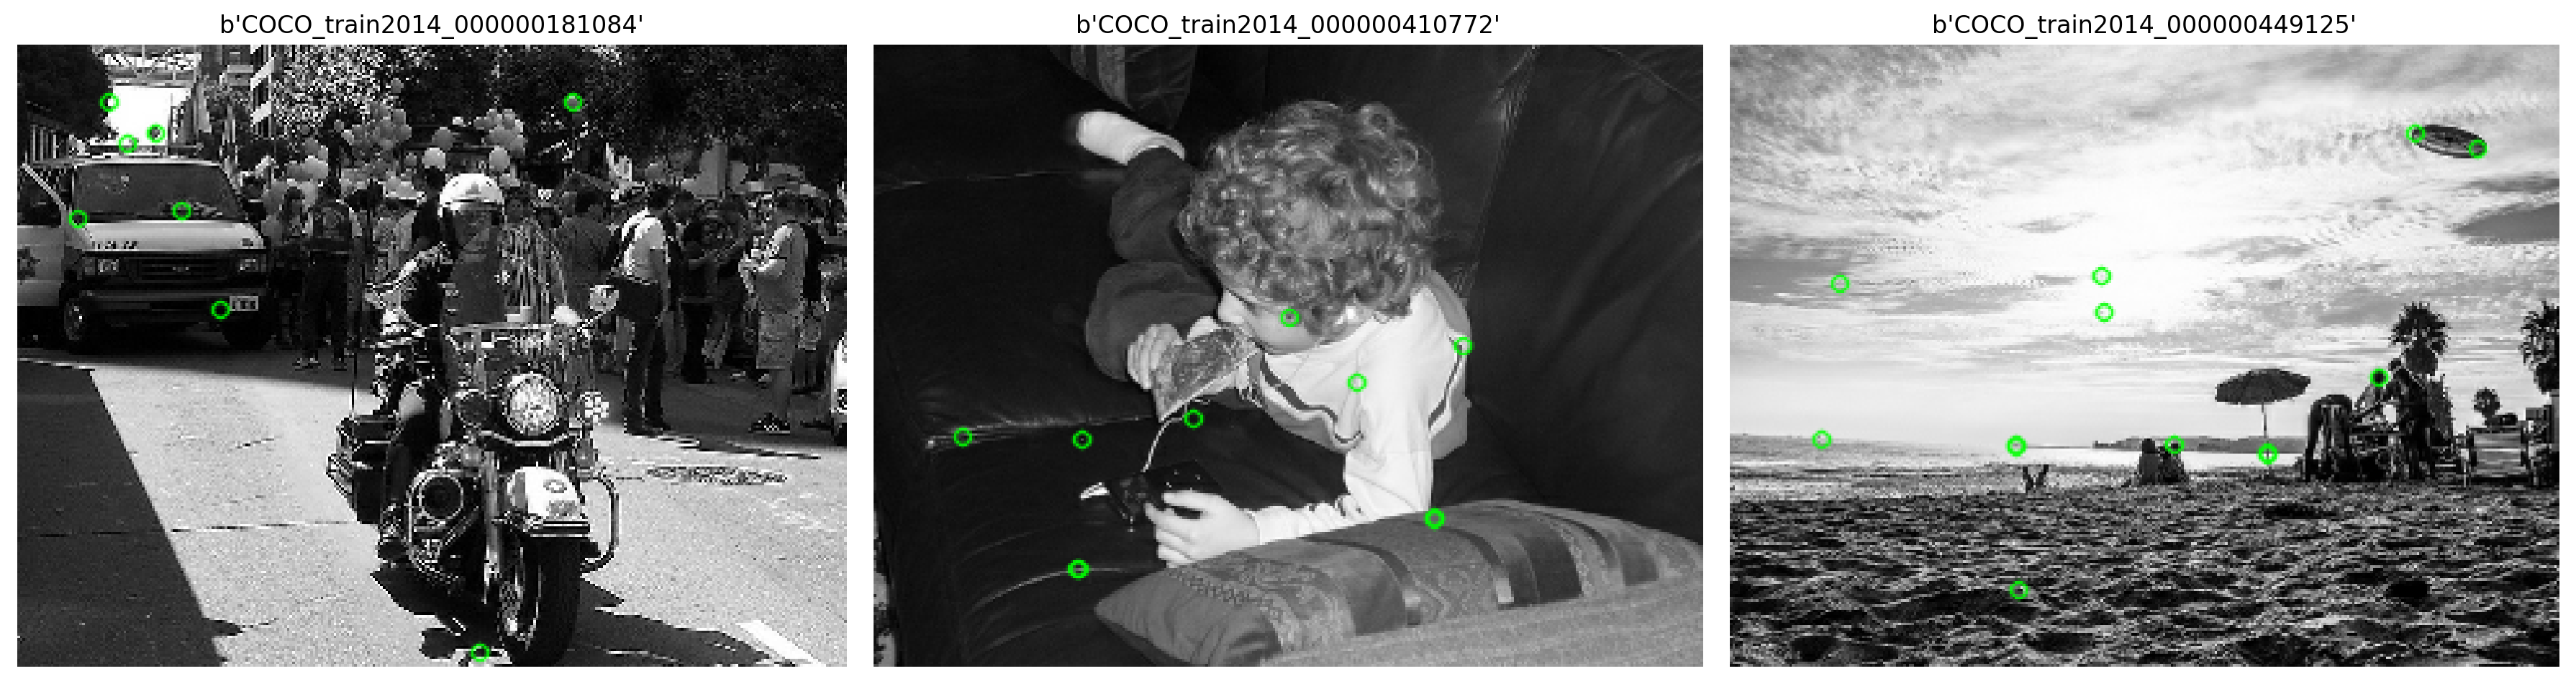

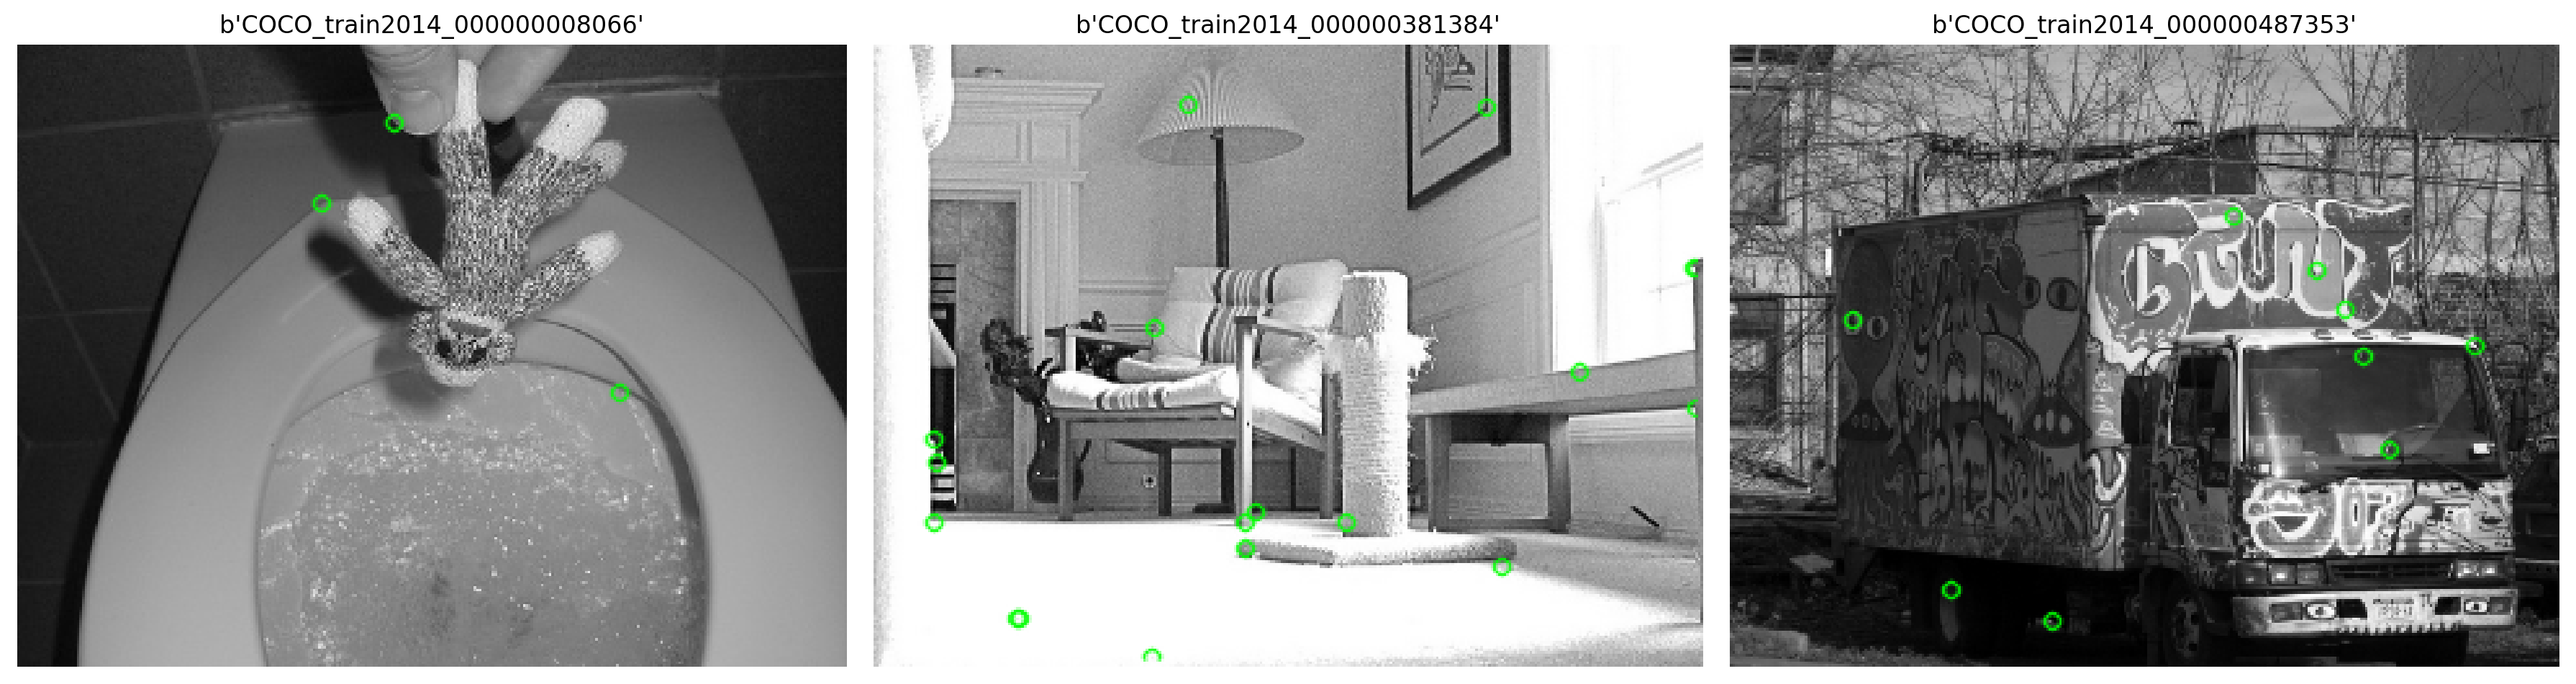

In [4]:
for i in range(15):
    images, names = [], []
    for _ in range(3):
        d = next(data)
        images.append(draw_keypoints(d['image'][..., 0], np.where(d['keypoint_map']), (0, 255, 0))/255.)
        names.append(d['name'])
    plot_imgs(images, titles=names, dpi=200, cmap='gray')